<a href="https://colab.research.google.com/github/samugatu/AnaliseDeDesempenhoAcademico/blob/main/Processo_Seletivo_CIS_IEEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PS_CIS_2025 - Avaliação Prática

# Bibliotecas e Dataframe

Primeiramente importar as principais bibliotecas que serão utilizadas no nosso programa:
Padas para trabalhar com os dados;
Matplotlib para visualizações gráficas;
Numpy para resolver as contas nescessárias;
Seaborn para vizualização dos dados também, dependedo do objetivo;
Sktlearn para os modelos de ML.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

Com a biblioteca pandas vamos ler o nosso dataset e definir o dataframe (df)

In [ ]:
url = 'https://drive.google.com/uc?id=17Wept1ikz3PLrwcSnEZX3S1pqki_b3jG'
df = pd.read_csv(url)

# Valores faltantes e Outliers

Agora que temos o dataframe, podemos começar respondedo as perguntas.

Primeiramente se existem valores faltantes ou otiliers no nosso dataset.

Para isso, podemos usar a fnção "df . insnull" para verificar se existe valores faltantes.

In [ ]:
valores_faltantes = df.isnull().sum()
print("Valores faltantes por coluna:")
print(valores_faltantes)

Valores faltantes por coluna:
Pregnancies                  0
Glucose                      4
BloodPressure               20
SkinThickness               10
Insulin                      3
BMI                         11
DiabetesPedigreeFunction     1
Age                          0
Outcome                      0
dtype: int64


Podemos verificar tambem zeros como possiveis valores invalidos:

In [ ]:
zero_como_invalido = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
for col in zero_como_invalido:
    print(f"{col} com valor 0: {(df[col] == 0).sum()} ocorrências")

Glucose com valor 0: 5 ocorrências
BloodPressure com valor 0: 34 ocorrências
SkinThickness com valor 0: 222 ocorrências
BMI com valor 0: 10 ocorrências


Beleza, agora que temos essas informações podemos tratar os dados. Primeiramente iremos remover as linhas que apresentam valores faltantes. Depois analisaremos as colunas que apresntam zero, pois esses zero pode nao fazer sentido. Por exemplo, faz sentido uma pessoa ter 0 gravidez, mas não faz sentido a pesssoa ter 0 de IMC. Assim, as colunas que farão sentido ter zeros vai ser: Pragnance, Insulin e o Outcome. O restante será dado como valor invalido, o tratamento sera feito por meio de remoção, que pode não ser o melhor, pois ira diminuir consideravelmente o numero de dados, mas ira deixa-lo bem "limpos".

In [ ]:
cols_zero_invalidas = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
df_limpo_zeros = df.copy()
df_limpo_zeros[cols_zero_invalidas] = df_limpo_zeros[cols_zero_invalidas].replace(0, np.nan)
df_limpo_zeros = df_limpo_zeros.dropna()

print(f"Total de linhas original: {len(df)}")
print(f"Total de linhas após remoção de linhas com valores faltantes: {len(df_limpo_zeros)}")

Total de linhas original: 768
Total de linhas após remoção de linhas com valores faltantes: 501


Note que originalmente o dato possuia 768 linhas e 267 foram removidas, diminuindo aproximadamente 35% do nosso dataset, isso pode afetar analises futuras.


Vamos observar os outliers graficamente:

Quantidade de outliers por coluna:
Pregnancies                 15
Glucose                      0
BloodPressure               15
SkinThickness                3
Insulin                     18
BMI                          7
DiabetesPedigreeFunction    15
Age                          9
Outcome                      0
dtype: int64


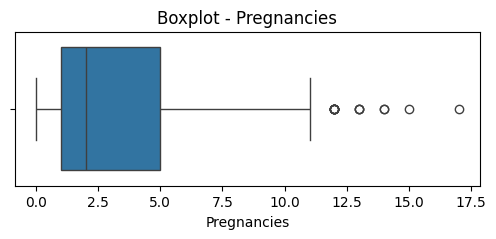

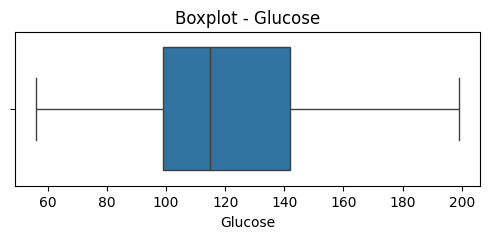

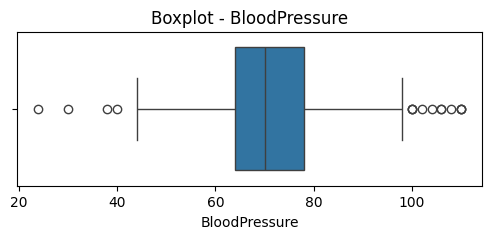

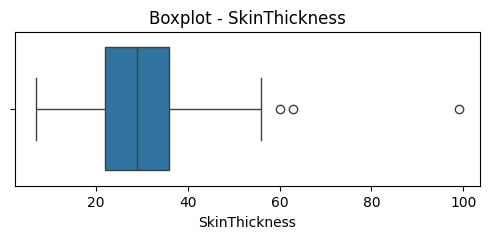

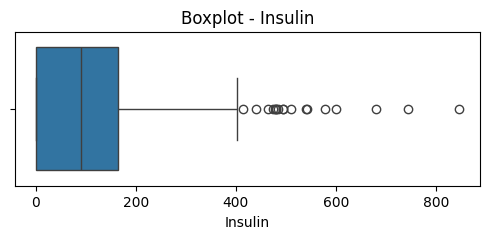

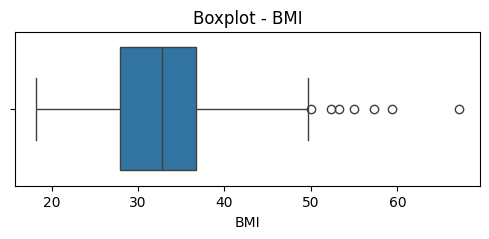

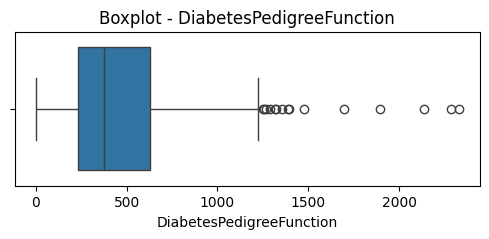

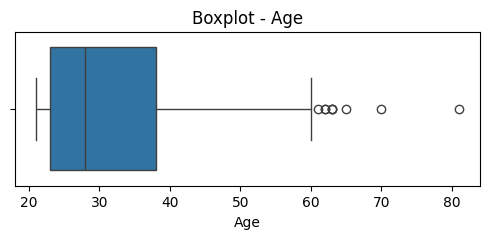

In [ ]:
cols_numericas = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Q1 = df_limpo_zeros.quantile(0.25)
Q3 = df_limpo_zeros.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_limpo_zeros < (Q1 - 1.5 * IQR)) | (df_limpo_zeros > (Q3 + 1.5 * IQR)))
print("Quantidade de outliers por coluna:")
print(outliers.sum())

for col in df_limpo_zeros.columns[:-1]:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df_limpo_zeros[col])
    plt.title(f'Boxplot - {col}')
    plt.show()

Dependendo dos casos a remoção de outliers se torna interessante, pois pode apresentar erro de medição ou algo do tipo. Para este estudo, não serao removidos e nem tratados por se tratar de doenças, tais outliers podem ser justamente a causa. Então todos serão mantidos

# Distribuição dos dados

Vamos ver agora que o nosso dataset esta limpo, como os dados estão distribuidos.

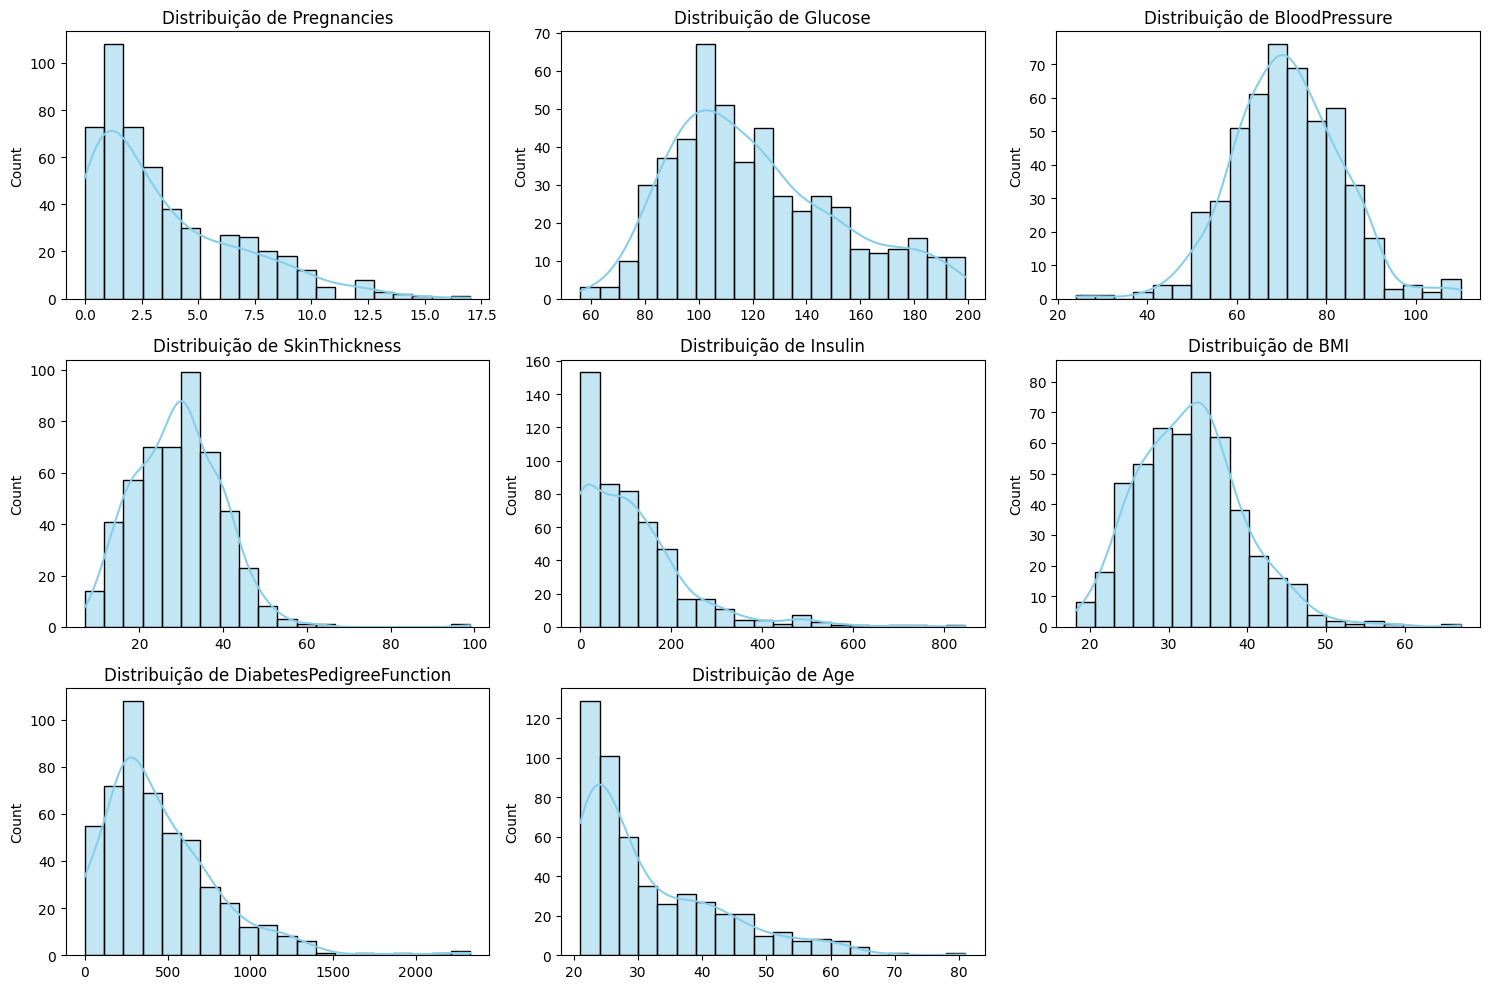

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_numericas, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_limpo_zeros[col], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribuição de {col}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

Nesta parte temos somente a vizaulização gráfica de como os dados estão distribuidos, onde estão os picos e como é decaimento de cada variável.


Ja vimos na etapa anterior a vizualização dos outliers utilizando boxplot.

# Correlação com a idade


Agora fazemos o teste de correalação:

In [ ]:
correlacao = df_limpo_zeros['Age'].corr(df_limpo_zeros['Outcome'])
print(f"Correlação entre Idade e Diabetes: {correlacao:.3f}")


Correlação entre Idade e Diabetes: 0.288


Podemos visualizar graficamente:

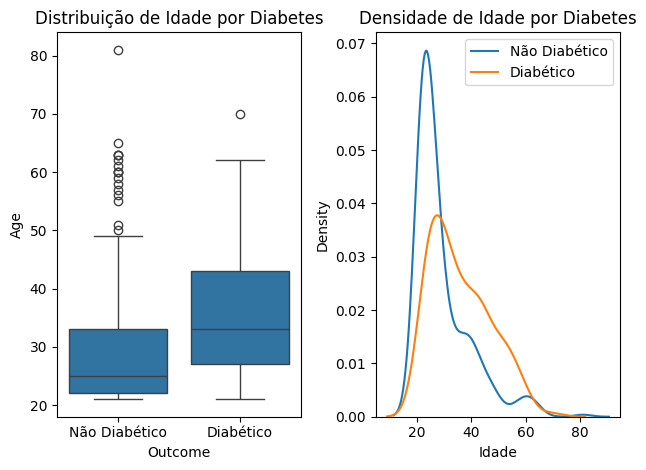

In [ ]:
plt.subplot(1, 2, 1)

sns.boxplot(x='Outcome', y='Age', data=df_limpo_zeros)
plt.title('Distribuição de Idade por Diabetes')
plt.xticks([0, 1], ['Não Diabético', 'Diabético'])

plt.subplot(1, 2, 2)
sns.kdeplot(df_limpo_zeros[df_limpo_zeros['Outcome']==0]['Age'], label='Não Diabético')
sns.kdeplot(df_limpo_zeros[df_limpo_zeros['Outcome']==1]['Age'], label='Diabético')
plt.title('Densidade de Idade por Diabetes')
plt.xlabel('Idade')
plt.legend()

plt.tight_layout()
plt.show()


Correlação 0.288 indica uma relação positiva fraca - isto é, quanto maior a idade, maior a tendência a diabetes.

Já no boxplot podemos ver que o grupo de diabeticos tem idade mais avançada que os não diabeticos.

Gráfico de densidade revela que a concetração dos casos estão em idades mais avançadas.

# Maiores correlações

Para analisar quais variaveis possuem maior correlação sera feito a matriz correlçao com a variavel outcome:

In [ ]:
correlacoes = df_limpo_zeros.corr()['Outcome'].sort_values(ascending=False)

print("Correlações com Diabetes (Outcome):")
print(correlacoes[1:])

Correlações com Diabetes (Outcome):
Glucose                     0.503136
BMI                         0.297259
Age                         0.287617
SkinThickness               0.245468
DiabetesPedigreeFunction    0.233000
Pregnancies                 0.230301
Insulin                     0.217488
BloodPressure               0.176008
Name: Outcome, dtype: float64


Vizualização gráfica:

<ipython-input-244-01d656f799e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes[1:].index, y=correlacoes[1:].values, palette="coolwarm")


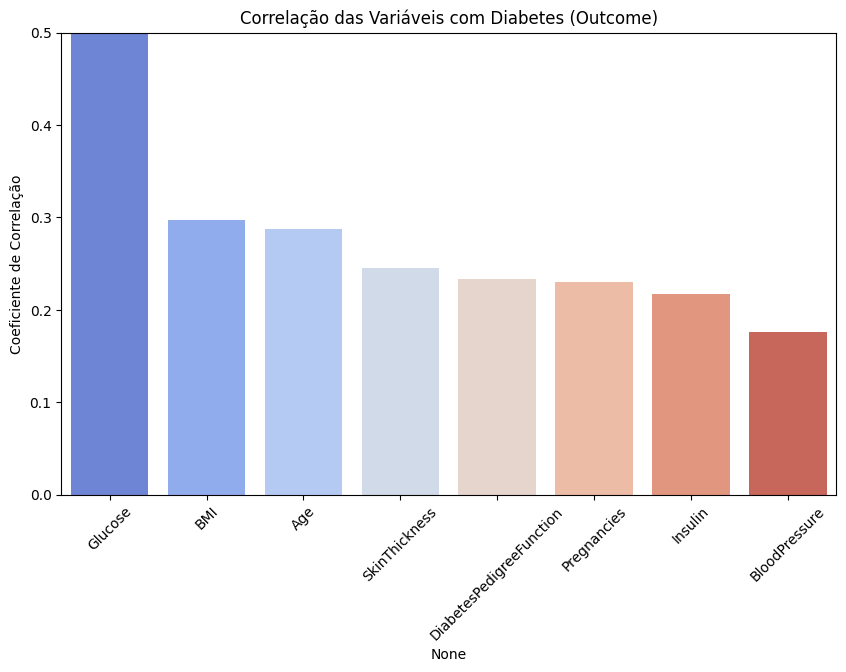

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlacoes[1:].index, y=correlacoes[1:].values, palette="coolwarm")
plt.title("Correlação das Variáveis com Diabetes (Outcome)")
plt.xticks(rotation=45)
plt.ylabel("Coeficiente de Correlação")
plt.ylim(0, 0.5)
plt.show()

Aqui, neste gráfico, podemos ver calaramente os impactos(correalçao) correlação de cada variável com o outcome. Lembrando que não é apenas uma variavel que indica se alguem possui ou não diabetes, porem algumas tem mais influencia e neste gráfico podemos notá-las.

# IMC x Diabetes

Vamos calcular a média dos imc's dos diabeticos e não diabeticos:

Primeiramente, separar os grupos

In [ ]:
bmi_diabeticos = df_limpo_zeros[df_limpo_zeros['Outcome'] == 1]['BMI']
bmi_nao_diabeticos = df_limpo_zeros[df_limpo_zeros['Outcome'] == 0]['BMI']

E agora, calcular a média:

In [ ]:
media_diabeticos = bmi_diabeticos.mean()
media_nao_diabeticos = bmi_nao_diabeticos.mean()

print(f"IMC Médio - Diabéticos: {media_diabeticos:.2f}")
print(f"IMC Médio - Não Diabéticos: {media_nao_diabeticos:.2f}")

IMC Médio - Diabéticos: 35.76
IMC Médio - Não Diabéticos: 31.45


Pacientes com diabetes têm um IMC médio maior comparado aos não diabéticos.

Isso sugere que o IMC maior que aproximadamente 31 Kg/m^2 está associada ao diabetes.

Vamos analisar gráficamente:

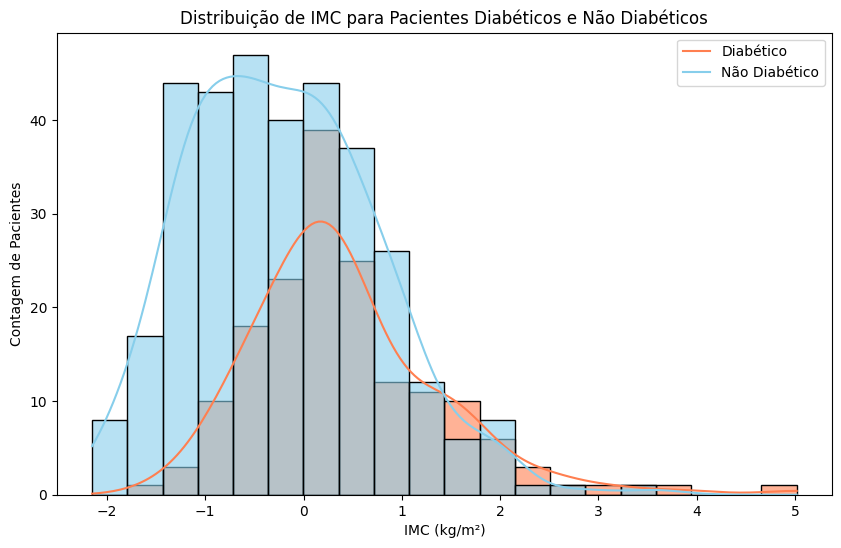

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_limpo_zeros, x='BMI', hue='Outcome', bins=20, kde=True,
             palette={0: 'skyblue', 1: 'coral'}, alpha=0.6)
plt.title('Distribuição de IMC para Pacientes Diabéticos e Não Diabéticos')
plt.xlabel('IMC (kg/m²)')
plt.ylabel('Contagem de Pacientes')
plt.legend(['Diabético', 'Não Diabético'])
plt.show()

A análise revela que pacientes com IMC ≥ 30 kg/m² apresentam risco significativamente maior de diabetes, com a proporção de casos aumentando progressivamente conforme a obesidade se agrava - na faixa de 35-40 kg/m² (Obesidade Grau I-II), os diabéticos já superam os não diabéticos. A distribuição de IMC nos diabéticos é deslocada em cerca de 4 kg/m² para cima em relação aos não diabéticos (médias de 35,14 vs 30,85 kg/m²), embora a significativa sobreposição na faixa de 25-30 kg/m² demonstre que o IMC, apesar de ser um importante fator de risco, não deve ser considerado isoladamente para diagnóstico, sendo necessária a avaliação conjunta com outros indicadores clínicos como os níveis de glicose para uma análise mais precisa do risco de diabetes.

# Glicose x Diabetes

Vamos ver o impacto da glicose no diagnotico de diabetes:


Novamente, separar os grupos:

In [ ]:
glicose_diab = df_limpo_zeros[df_limpo_zeros['Outcome'] == 1]['Glucose']
glicose_nao_diab = df_limpo_zeros[df_limpo_zeros['Outcome'] == 0]['Glucose']




E pegar as médias:

In [ ]:
print("Glicose média Diabéticos:\n", glicose_diab.mean())
print("\n Glicose média Não Diabéticos:\n", glicose_nao_diab.mean())

Glicose média Diabéticos:
 143.6144578313253

 Glicose média Não Diabéticos:
 110.25074626865671


Grafico de densidade:

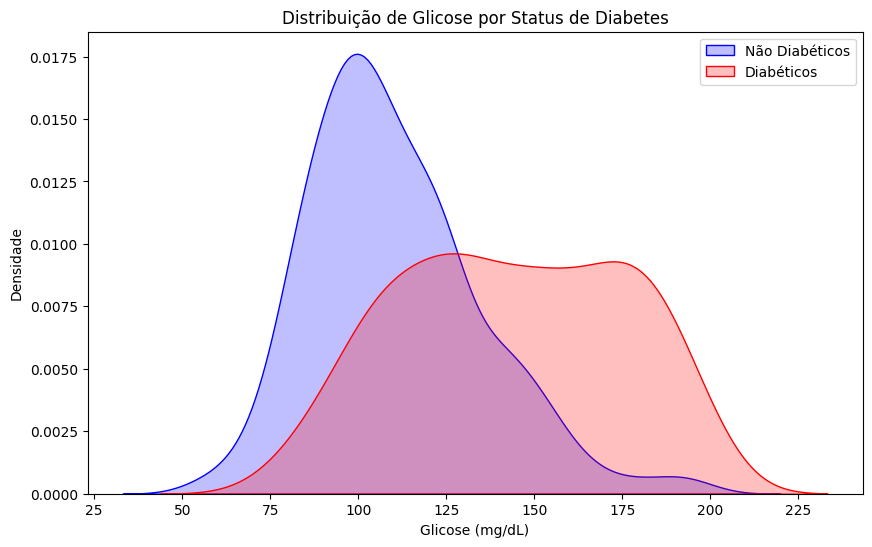

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(glicose_nao_diab, label='Não Diabéticos', color='blue', fill=True)
sns.kdeplot(glicose_diab, label='Diabéticos', color='red', fill=True)
plt.title('Distribuição de Glicose por Status de Diabetes')
plt.xlabel('Glicose (mg/dL)')
plt.ylabel('Densidade')
plt.legend()
plt.show()

As curvas se cruzam em torno de 125–130 mg/dL.

Acima desse ponto, a densidade de diabéticos predomina.

Assim, estima-se um ponto critico ligeiramente maior que 125 mg/dL, algumas contas estatisticas poderiam ser feitas para chegar em um valor mais preciso, mas podemos verificar este valor com o grafico de disperssão:


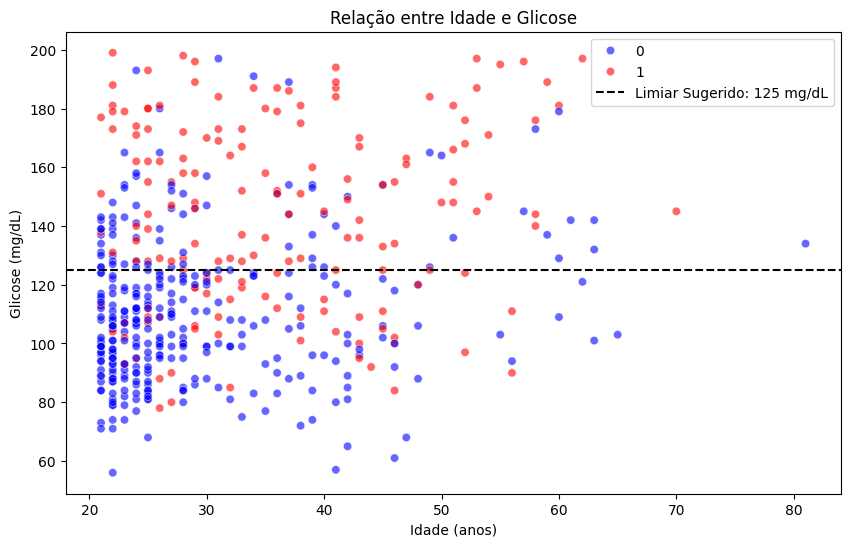

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_limpo_zeros, x='Age', y='Glucose', hue='Outcome',
                palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.axhline(y=125, color='black', linestyle='--',
            label=f'Limiar Sugerido: 125 mg/dL')
plt.title('Relação entre Idade e Glicose')
plt.xlabel('Idade (anos)')
plt.ylabel('Glicose (mg/dL)')
plt.legend()
plt.show()

A análise dos dados mostrou que 125 mg/dL é um nível importante de glicose para identificar diabetes. Pessoas com valores acima desse número têm muito mais chance de ter diabetes comparado com quem está abaixo. Esse valor faz sentido porque é onde os grupos de diabéticos e não diabéticos mais se diferenciam nos dados. O resultado confirma o que os médicos já usam na prática (126 mg/dL), mostrando que é um bom limite para diagnóstico.

# Previsão de diabétes

biblitecas adicionais:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


Separar fetures (x) e target (y):

In [ ]:
X = df_limpo_zeros.drop('Outcome', axis=1)
y = df_limpo_zeros['Outcome']


Dividir em treino e teste (70/30):

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Criar e treinar o modelo:

In [ ]:
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Prever no conjunto teste:

In [ ]:
y_pred = modelo.predict(X_test)


Calcular acurácia:

In [ ]:
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acuracia:.2%}")

Acurácia: 72.85%


Analise e resultados:

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        93
           1       0.67      0.59      0.62        58

    accuracy                           0.73       151
   macro avg       0.71      0.70      0.71       151
weighted avg       0.72      0.73      0.72       151



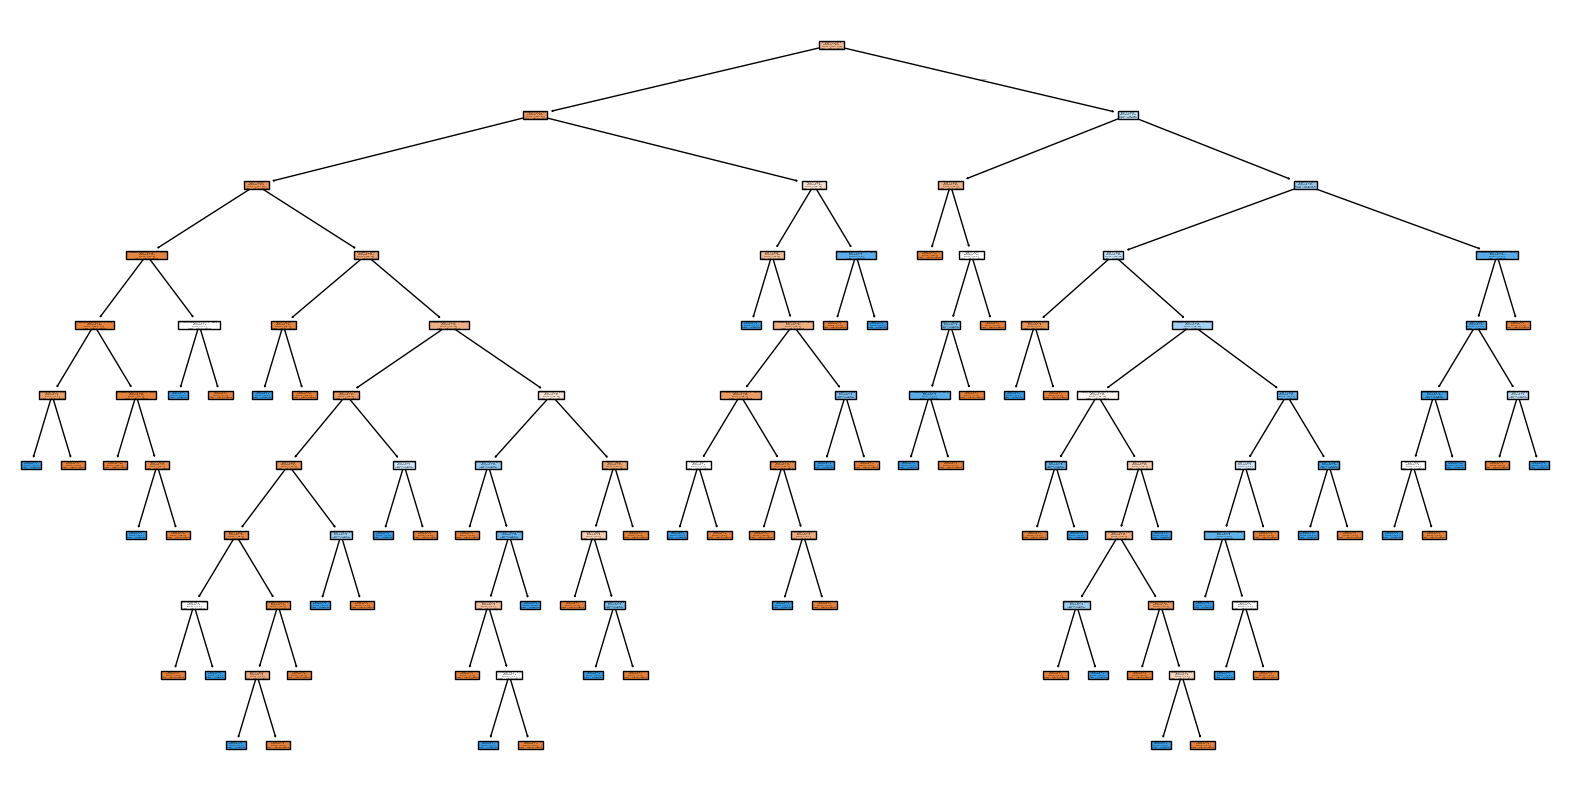

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(modelo, feature_names=X.columns, class_names=['Não Diabético', 'Diabético'], filled=True)
plt.show()

Acurácia de 72.85%, basicamente o modelo acerta cerca de 7 em 10 previsões.
Problema: Baixo desempenho na classe 1 (diabéticos), com precision de 67% e recall de 62%.

O modelo acerta bem quando diz que uma pessoa não tem diabetes (76% de acerto), identificando a maioria dos casos saudáveis (82%). Porém, tem dificuldade com quem **tem diabetes**: acerta só 67% das vezes que diz "diabético" e deixa passar 41% dos casos reais - um problema grave se for usado em hospitais. A taxa geral de acertos é 73%, mas isso esconde o fato de que o modelo erra muito mais com diabéticos, provavelmente porque há menos exemplos deles nos dados (93 saudáveis contra 58 diabéticos). Para melhorar, precisamos:
1. Equilibrar os dados (dar mais peso aos casos de diabetes)
2. Ajustar o modelo para pegar mais diabéticos, mesmo que isso aumente um pouco os erros em saudáveis.

# Hisórico familiar x diabétes

Vamos ver as estatisiticas descritivas:


In [ ]:
print(df_limpo_zeros.groupby('Outcome')['DiabetesPedigreeFunction'].describe())

         count        mean         std   min    25%    50%    75%     max
Outcome                                                                  
0        335.0  396.125910  307.156484  0.10  197.5  317.0  545.5  2329.0
1        166.0  569.041446  399.259295  0.15  272.5  502.5  758.5  2288.0


Podemos notar que a média dos diabetico é consideravelemte maior (396 para nao diabéticos x 569 para diabeticos) e a mediana também (317 para nao diabético e 502 para diabeticos).

Agora olhando graficamente:


<ipython-input-261-dac18b0f07b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df_limpo_zeros, palette="coolwarm")


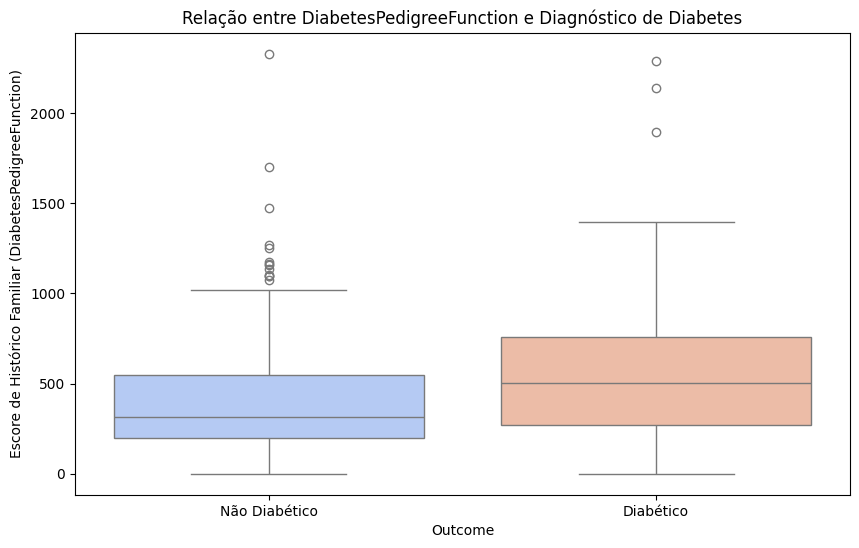

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df_limpo_zeros, palette="coolwarm")
plt.title('Relação entre DiabetesPedigreeFunction e Diagnóstico de Diabetes')
plt.xticks([0, 1], ['Não Diabético', 'Diabético'])
plt.ylabel('Escore de Histórico Familiar (DiabetesPedigreeFunction)')
plt.show()

Diabéticos apresentam valores mais altos, especialmente no 3º quartil (545 para não diabéticos e 758 para diabéticos)

Podemos fazer uma análise de risco dividindo em categorias (pegando a taxa de diabete por categoria):

In [ ]:
df_limpo_zeros['Risco_Familiar'] = pd.cut(df_limpo_zeros['DiabetesPedigreeFunction'],
                              bins=[0, 300, 600, 2500],
                              labels=['Baixo', 'Médio', 'Alto'])

taxa_diabetes = df_limpo_zeros.groupby('Risco_Familiar')['Outcome'].mean()*100
print(taxa_diabetes)

Risco_Familiar
Baixo    22.167488
Médio    33.742331
Alto     48.888889
Name: Outcome, dtype: float64


<ipython-input-262-ac247017b8f5>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_diabetes = df_limpo_zeros.groupby('Risco_Familiar')['Outcome'].mean()*100


Assim podemos pensar que quem tem score familiar alto, isto é entre 600 e 2500, tem praticamente o dobro de chance de ter diabetes que uma pessoa com risco familiar considerado baixo.


# Maiores de 50 anos

Vamos agora fazer algumas comparações estatisticas entre pessoas com mais de 50 anos e pessoas com 50 anos ou menos.

Primeiramente dividir os grupos:

In [ ]:
df_limpo_zeros['Faixa_Etaria'] = df_limpo_zeros['Age'].apply(lambda x: '>50 anos' if x > 50 else '≤50 anos')

Agoras pegar as estatisticas descritivas:

In [ ]:
taxa_diabetes = df_limpo_zeros.groupby('Faixa_Etaria')['Outcome'].mean() * 100
print(taxa_diabetes)

Faixa_Etaria
>50 anos    60.000000
≤50 anos    30.802603
Name: Outcome, dtype: float64


Pela faixa etária pessoas com mais de 50 anos tem o dobro de chances de possuir diabetes comparado com pessoas com 50 anos ou menos.


Agora fazendo uam vizualização gráfica:

<ipython-input-265-61dee540a060>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Faixa_Etaria', y='Outcome', data=df_limpo_zeros, ci=None, palette='viridis')
<ipython-input-265-61dee540a060>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Faixa_Etaria', y='Outcome', data=df_limpo_zeros, ci=None, palette='viridis')


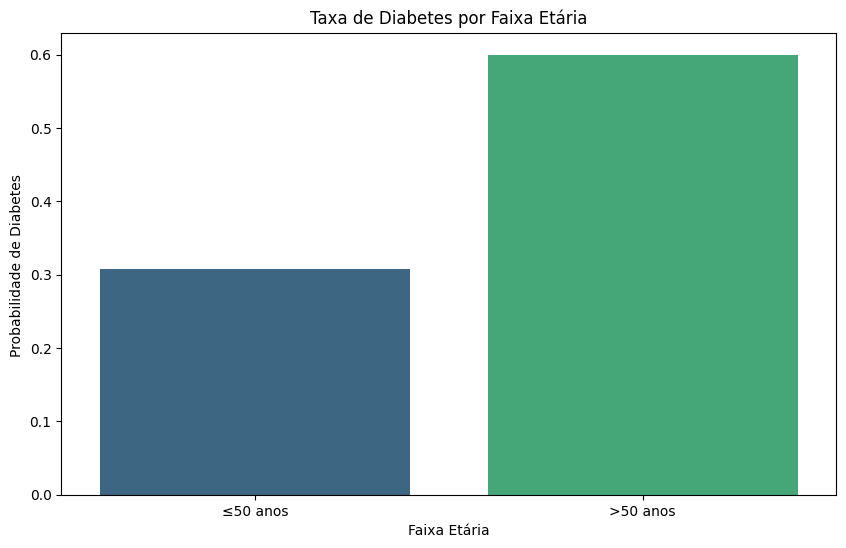

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Faixa_Etaria', y='Outcome', data=df_limpo_zeros, ci=None, palette='viridis')
plt.title('Taxa de Diabetes por Faixa Etária')
plt.ylabel('Probabilidade de Diabetes ')
plt.xlabel('Faixa Etária')
plt.show()

Podemos também ver a distribuição por um histograma:

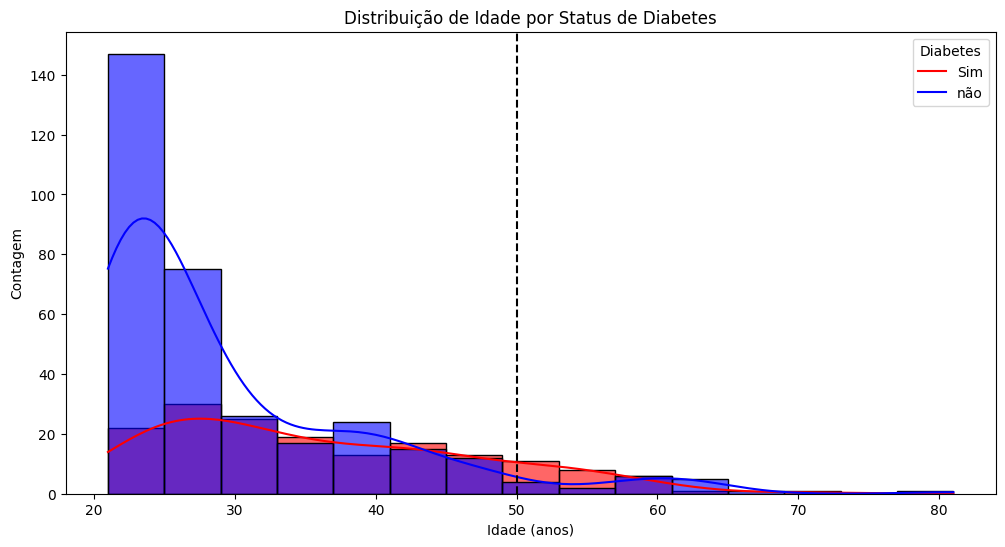

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_limpo_zeros, x='Age', hue='Outcome', bins=15, kde=True,
             palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.axvline(x=50, color='black', linestyle='--', label='Limite 50 anos')
plt.title('Distribuição de Idade por Status de Diabetes')
plt.xlabel('Idade (anos)')
plt.ylabel('Contagem')
plt.legend(title='Diabetes', labels=['Sim', 'não'])
plt.show()

Pico de casos de diabetes após os 50 anos.
Poucos diabéticos abaixo dos 30 anos.

# Regressão logística

Primeiramente importar mais algumas coisas que serão importantes para o pre-processamento e para a regressão logistica.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

 Separar variáveis preditoras (X) e target (y)

In [ ]:
X = df_limpo_zeros.drop('Outcome', axis=1)
y = df_limpo_zeros['Outcome']

Deixar somente as variaveis numéricas:

In [ ]:
X_numeric = df_limpo_zeros.select_dtypes(include=np.number).drop('Outcome', axis=1)

Padronizar as variáveis:

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

Dividir em treino e teste (70/30):

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Modelo de regressão logistica:

In [ ]:
modelo = LogisticRegression(penalty='l2', C=1.0, random_state=42)
modelo.fit(X_train, y_train)


LogisticRegression(random_state=42)

Coeficientes do modelo:

In [ ]:
coeficientes = pd.DataFrame({
    'Variável': X_numeric.columns,
    'Coeficiente': modelo.coef_[0],
    'Odds Ratio': np.exp(modelo.coef_[0])
}).sort_values('Odds Ratio', ascending=False)


Saída:

In [ ]:
print(coeficientes)

                   Variável  Coeficiente  Odds Ratio
1                   Glucose     0.975714    2.653060
5                       BMI     0.530166    1.699215
0               Pregnancies     0.430146    1.537483
6  DiabetesPedigreeFunction     0.307560    1.360102
7                       Age     0.156090    1.168931
3             SkinThickness     0.122227    1.130011
4                   Insulin    -0.043444    0.957486
2             BloodPressure    -0.113746    0.892485


Os resultados da análise mostram que a glicose é o fator mais importante para determinar se alguém tem diabetes. Para cada aumento de uma unidade na glicose, a chance de ter diabetes mais que dobra (Odds Ratio de 2,65).

Outros fatores que aumentam o risco de diabetes incluem:

- BMI: aumenta o risco em 70% (Odds Ratio de 1,70)
- Número de gravidezes: aumenta o risco em 54% (Odds Ratio de 1,54)
- Histórico familiar: aumenta o risco em 36%
- Idade: aumenta o risco em 17%
- Espessura da pele: aumenta o risco em 13%

Já a insulina e pressão arterial não parecem ser bons indicadores de diabetes isoladamente.

Em resumo, os principais fatores de risco para diabetes são glicose elevada, obesidade (BMI alto) e histórico familiar.

# Melhorias

Variáveis como a glucose, pressão sanguínea e IMC, possuem escalas diferentes. Pode ser interessante aplicar algumas técnicas de padronização (StandardScaler) ou de normalização (MinMaxScaler). Isto oide ajudar alguns modelos de machine Learning.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
df_limpo_zeros[['Glucose', 'BMI']] = scaler.fit_transform(df_limpo_zeros[['Glucose', 'BMI']])

Podemos também fazer transformações logaritimas, como na insulina, deste modo o impacto de Outliers é reduzido.

In [ ]:
df_limpo_zeros['Insulin_log'] = np.log1p(df_limpo_zeros['Insulin'])

Podemos também criar variáveis que são  interações enter duas existentes.
Como a Glicose x IMC que pode indicar um rissco metabólico. E também ajustar a pressão arterial por idade.

In [ ]:
df_limpo_zeros['Glucose_BMI'] = df_limpo_zeros['Glucose'] * df_limpo_zeros['BMI']
df_limpo_zeros['BP_Age'] = df_limpo_zeros['BloodPressure'] * df_limpo_zeros['Age']

Assim, podemos criar um índice de risco combinado com as várias variáveis que criamos:

In [ ]:
df_limpo_zeros['Risk_Score'] = (df_limpo_zeros['Glucose'] / 100) + (df_limpo_zeros['BMI'] / 30) + (df_limpo_zeros['Age'] / 50)

Podemos fazer o tratamento deoutliers, limitando valores extremos ou removendo valores absurdos como imc > 60. Nesse problema, será mantido todos os outliers.

A seleção de features é como escolher os ingredientes mais importantes para uma receita: em vez de usar tudo, você seleciona apenas as variáveis que realmente ajudam a prever o resultado. Isso melhora o modelo, evita confusão com dados desnecessários e deixa tudo mais simples. Pode-se fazer isso verificando quais features têm maior relação com o diagnóstico (como "Glicose" ou "IMC") ou usando métodos que automaticamente rankeiam a importância de cada uma (como no Random Forest). Features fracas são descartadas, deixando apenas as que fazem diferença. Assim, o modelo fica mais preciso e rápido, sem perder qualidade.

In [ ]:
correlation = df_limpo_zeros.select_dtypes(include=np.number).corr()['Outcome'].abs().sort_values(ascending=False)
features_selecionadas = correlation[correlation > 0.1].index
df_selecionado = df_limpo_zeros[features_selecionadas]

Vamos primeiro testar o modelo com os dados originais para ver como ele se sai. Depois, vamos criar novas variáveis a partir desses dados e testar de novo, comparando os resultados pra ver se melhorou.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder


X = df_limpo_zeros.drop('Outcome', axis=1)
y = df_limpo_zeros['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

encoder = LabelEncoder()
for col in ['Risco_Familiar', 'Faixa_Etaria']:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

X_train['Glucose_BMI'] = X_train['Glucose'] * X_train['BMI']
X_test['Glucose_BMI'] = X_test['Glucose'] * X_test['BMI']


model_original = RandomForestClassifier(random_state=42)
model_original.fit(X_train.drop('Glucose_BMI', axis=1), y_train)
y_pred_original = model_original.predict(X_test.drop('Glucose_BMI', axis=1))
print("Acurácia (Original):", accuracy_score(y_test, y_pred_original))
print("AUC-ROC (Original):", roc_auc_score(y_test, y_pred_original))

model_new = RandomForestClassifier(random_state=42)
model_new.fit(X_train, y_train)
y_pred_new = model_new.predict(X_test)
print("Acurácia (Com Feature Engineering):", accuracy_score(y_test, y_pred_new))
print("AUC-ROC (Com Feature Engineering):", roc_auc_score(y_test, y_pred_new))

Acurácia (Original): 0.8013245033112583
AUC-ROC (Original): 0.7770671116054876
Acurácia (Com Feature Engineering): 0.8079470198675497
AUC-ROC (Com Feature Engineering): 0.7824434556915091


Os resultados mostram que o modelo com feature engineering teve um desempenho ligeiramente melhor em comparação ao original, com um aumento de 0,66% na acurácia (de 80,13% para 80,79%) e 0,54% no AUC-ROC (de 77,71% para 78,24%). Isso indica que as novas features (como a interação entre `Glucose` e `BMI`) adicionaram algum valor preditivo, ainda que modesto. No entanto, a diferença é pequena, sugerindo que as features originais já eram bastante informativas ou que as transformações aplicadas não capturaram relações mais complexas nos dados. Para melhorias mais significativas, seria interessante testar outras técnicas de feature engineering (ex: polinômios, agregações) ou ajustar hiperparâmetros do modelo.